# MTH9879 Homework 7

Assigned: March 22, 2018.
Due: April 5, 2018 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### 0. (0 points) 
Read Sections 4, 5 and 6 of Bouchaud, Farmer and Lillo.

## Long memory

### 1. (6 points)

Consider the long memory process

$$
X_T=\sum_{i=1}^T\,\epsilon_i
$$

with autocovariance function $\gamma(\tau)=\E[\epsilon_i\,\epsilon_{i-\tau}] \sim \tau^{-\alpha}$.  Show that as $\tau \to \infty$,

$$
\Var[X_{t+\tau}-X_t] \sim \tau ^{2\,H}
$$

where the Hurst exponent $H$ is given by

$$
H=1-\frac{\alpha}{2}.
$$

### Solution

$$\Var[X_{t+\tau}-X_t]=\Var \left[\sum_{i=t+1}^{t+\tau} \epsilon_i \right]= \sum_{i=1}^{\tau}\sum_{j=1}^{\tau}\E[\epsilon_i\epsilon_j]$$

As $\E[\epsilon_i\epsilon_{i-\tau}]\sim\tau^{-\alpha}$,

$$\Var[X_{t+\tau}-X_t] \sim \sum_{i=1}^{\tau}\sum_{j=1}^{\tau} \left| i-j \right|^{-\alpha}=\tau+2\sum_{i=1}^{\tau-1} \frac{\tau-i}{i^\alpha}$$

For the second term, the following inequality holds,

$$\sum_{i=1}^{\tau-1} \frac{\tau-i}{i^\alpha} \leq \tau\sum_{i=1}^{\tau} \frac{1}{i^\alpha} \leq \tau\int_0^\tau x^{-\alpha} dx \leq \tau^{2-\alpha}$$

Therefore we have

$$\Var[X_{t+\tau}-X_t] \sim \tau + \tau^{2-\alpha}$$

Let $\tau\to\infty$ and assume $\alpha<1$, then the second term becomes dominant and

$$\Var[X_{t+\tau}-X_t] \sim \tau^{2H}$$

where 

$$H=1-\frac{\alpha}{2}$$

## BAC data from 19-Sep-2017 again

In [5]:
options(warn = -1)

library(highfrequency)
library(repr)
options(repr.plot.width=10,repr.plot.height=7)

In [6]:
download.file(url="https://mfe.baruch.cuny.edu/wp-content/uploads/2018/02/tqDataBAC_20170919.zip", destfile="tq.zip")
unzip(zipfile="tq.zip")

load("tqDataBAC_20170919.rData")
tqBAC <- tqdata
Sys.setenv(TZ='EST')

### 2. (10 points)

(a) Generate the series *tradeSign* of trade signs from `tqdata`.

(b) Fit an AR(1) model to the *tradeSign*  data to give the forecast:
    $$
    \hat \epsilon^{(1)}_t=\phi_1\,\epsilon_{t-1}
    $$

(c) How does $\phi_1$ relate to the autocorrelation coefficients of *tradeSign*?  What is the mean-squared error of this AR(1) forecast?

(d) Fit an $AR(p)$ model to the *tradeSign* data, allowing R to find the best value of $p$ using the default AIC criterion.  This generates the forecast:
    $$
    \hat \epsilon^{(2)}_t=\sum_{k=1}^p\,\phi_k\,\epsilon_{t-k}.
    $$

(e) What value of $p$ is selected by R?  What is the mean-squared error of this AR(p) forecast?


### Solution

(a)

In [9]:
# Decide trade signs
tradeSigns <- getTradeDirection(tqBAC)
head(tradeSigns)

[1] -1 -1 -1  1 -1  1

(b)

In [11]:
# AR(1)
fit <- ar(tradeSigns, order.max=1)
fit


Call:
ar(x = tradeSigns, order.max = 1)

Coefficients:
     1  
0.4752  

Order selected 1  sigma^2 estimated as  0.7644

(c)


Autocorrelations of series 'tradeSigns', by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.475 0.379 0.350 0.324 0.305 0.284 0.267 0.250 0.240 0.232 0.227 0.214 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
0.201 0.200 0.199 0.188 0.181 0.172 0.169 0.169 0.164 0.160 0.158 0.159 0.156 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
0.150 0.148 0.142 0.134 0.138 0.139 0.122 0.119 0.121 0.111 0.112 0.114 0.105 
   39    40    41    42    43 
0.107 0.108 0.104 0.104 0.104 

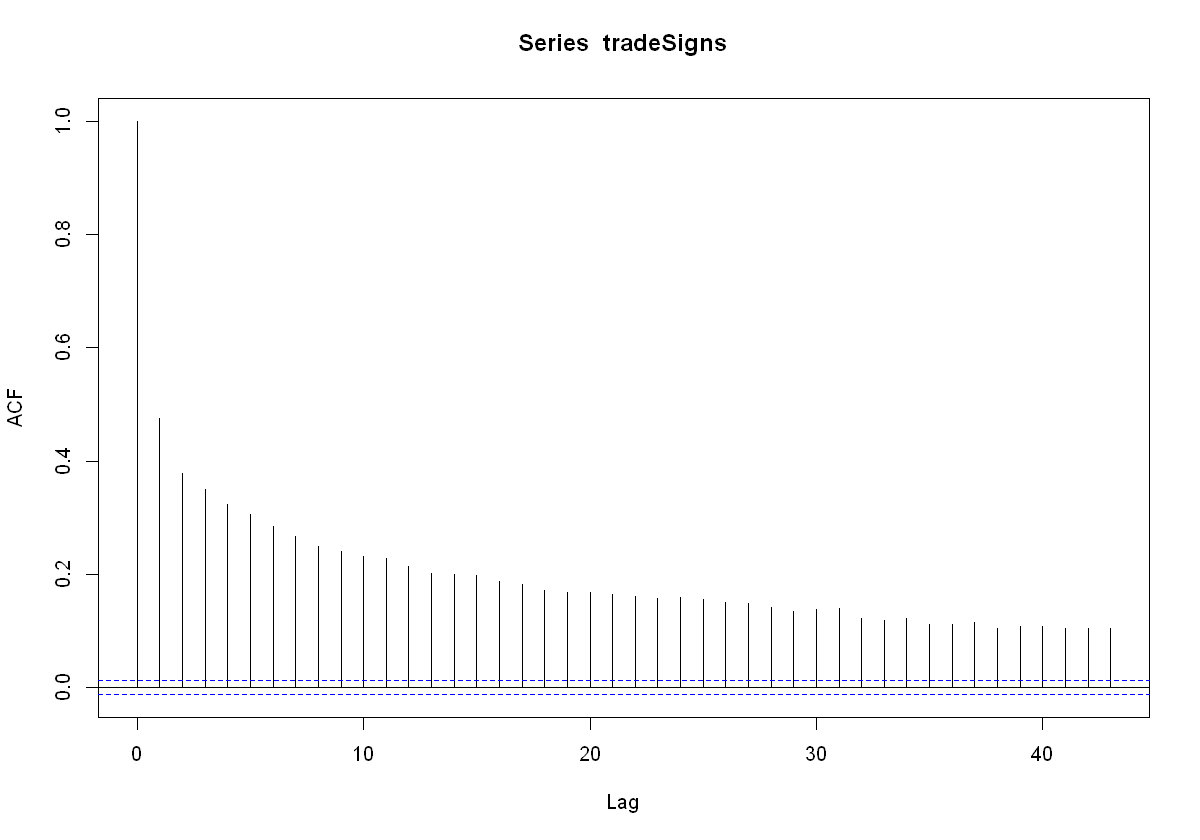

In [14]:
acf(tradeSigns, plot=F)
acf(tradeSigns)

If the *tradeSign* is correctly specified as an AR(1) model, the autocorrelations of it should be

$$\rho_k=\phi_1^k$$

However, only $\rho_1$ matches the autocorrelation of real data, which implies that AR(1) model is insufficient for the *tradeSign* series.

(d)

In [12]:
# Decide p
library(forecast)
fit <- auto.arima(tradeSigns, max.p=100, max.d=0, max.q=0, ic="aic")
fit

Loading required package: timeDate
This is forecast 7.3 



Series: tradeSigns 
ARIMA(17,0,0) with non-zero mean 

Coefficients:
         ar1     ar2     ar3     ar4     ar5     ar6     ar7     ar8     ar9
      0.3120  0.1025  0.0869  0.0576  0.0476  0.0313  0.0238  0.0135  0.0155
s.e.  0.0064  0.0067  0.0067  0.0068  0.0068  0.0068  0.0068  0.0068  0.0068
        ar10    ar11    ar12    ar13    ar14    ar15    ar16    ar17  intercept
      0.0149  0.0220  0.0099  0.0008  0.0136  0.0208  0.0084  0.0133    -0.1128
s.e.  0.0068  0.0068  0.0068  0.0068  0.0068  0.0067  0.0067  0.0064     0.0259

sigma^2 estimated as 0.6969:  log likelihood=-30281.3
AIC=60600.59   AICc=60600.62   BIC=60754.58

(e)

In [15]:
# Rerun AR(17)
fit <- ar(tradeSigns, order.max=17)
fit


Call:
ar(x = tradeSigns, order.max = 17)

Coefficients:
     1       2       3       4       5       6       7       8       9      10  
0.3120  0.1025  0.0868  0.0576  0.0476  0.0313  0.0238  0.0136  0.0155  0.0149  
    11      12      13      14      15      16      17  
0.0220  0.0099  0.0008  0.0136  0.0207  0.0084  0.0133  

Order selected 17  sigma^2 estimated as  0.6969

### 3. (8 points)

(a) Bin the AR(p) forecast data from the previous problem by forecast sign with bin-breaks from -1.05 to 1.05 in steps of 0.10.

(b) Plot the average actual order sign in each bin against the average forecast order sign.  What is the slope of the resulting graph? (Hint: use the R function *lm*).

(c) If the expected order sign is $\hat \epsilon$, what is the probability $p$ that the next trade will be a market buy?

### Solution

(a)

(b)

(c)